[(0.0, -0.026165659513955504), (0.06294768132848073, 0.0425537453398042), (0.12564569052682642, 0.13458422534737705), (0.18784534575034617, 0.2456656425378569), (0.24929994179742526, 0.2603831357077609), (0.3097657286271115, 0.45677197963824445), (0.36900287815551913, 0.4315969815286268), (0.42677643549640365, 0.3828145511345361), (0.48285725087296066, 0.4953113474330268), (0.5370228885045659, 0.5208665744443008), (0.5890585088635009, 0.5328874874199518), (0.638757720802328, 0.6159680433187048), (0.6859234001720882, 0.6675802841121202), (0.7303684716843996, 0.6664058792818204), (0.7719166509163209, 0.813260856729632), (0.8104031435149364, 0.8645425295389486), (0.8456752988283757, 0.8472583497281889), (0.8775932153707428, 0.8935229892981804), (0.906030295719473, 0.8602877021285281), (0.9308737486442042, 0.9715837404575367), (0.9520250364755461, 1.0345888742621583), (0.9694002659393304, 0.9036800247574748), (0.982930520906158, 0.9156844518442594), (0.9925621357364444, 1.0368505215349235)

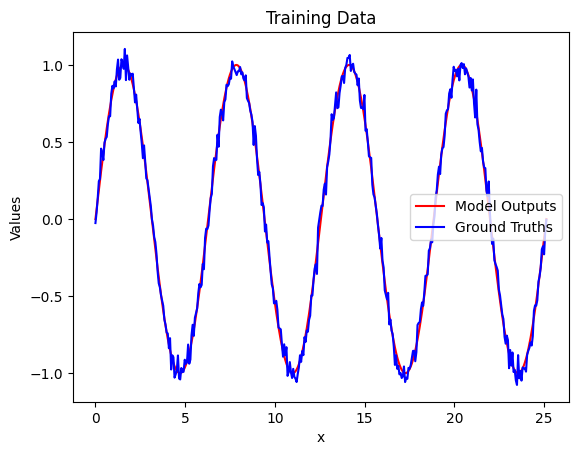

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
# model_outputs = np.array([2.5, 3.6, 4.1, 5.7, 6.3])
# ground_truths = np.array([2.4, 3.8, 4.0, 5.5, 6.1])
x = np.linspace(0, 2 * np.pi * 4, 100 * 4)
ground_truths = np.sin(x) + np.random.normal(0, 0.05, x.shape)
model_outputs = np.sin(x)

# Create training archive
training_archive = list(zip(model_outputs, ground_truths))
print(training_archive)

# Plot the training data
plt.plot(x, model_outputs, color='red', label='Model Outputs')
plt.plot(x, ground_truths, color='blue', label='Ground Truths')
plt.xlabel('x')
plt.ylabel('Values')
plt.title('Training Data')
plt.legend()
plt.show()


In [35]:
# Sort the training archive by model outputs
sorted_archive = sorted(training_archive, key=lambda x: x[0])
sorted_model_outputs, sorted_ground_truths = zip(*sorted_archive)
print(sorted_model_outputs)
print(sorted_ground_truths)

(-0.9999922506833704, -0.9999302568709548, -0.9998062730893862, -0.9996203070249514, -0.9993723702064851, -0.999062478004655, -0.9986906496310091, -0.9982569081367841, -0.9977612804114777, -0.9972037971811801, -0.9965844930066697, -0.9959034062812712, -0.9951605792284743, -0.9943560578993167, -0.9934898921695294, -0.9925621357364445, -0.9915728461156653, -0.9905220846375034, -0.9894099164431722, -0.9882364104807536, -0.9870016395009191, -0.985705680052423, -0.9843486124773543, -0.9829305209061581, -0.9814514932524177, -0.9799116212074077, -0.9783110002344058, -0.9766497295627777, -0.9749279121818235, -0.9731456548343947, -0.9713030680102744, -0.9694002659393307, -0.967437366584431, -0.9654144916341344, -0.9633317664951415, -0.9611893202845256, -0.9589872858217233, -0.9567257996203051, -0.9544050018795073, -0.9520250364755466, -0.949586050952693, -0.9470881965141309, -0.9445316280125792, -0.941916503940694, -0.9392429864212436, -0.9365112411970554, -0.9337214376207419, -0.93087374864420

[1.         0.5        0.33333333 0.75       0.6        0.66666667
 0.42857143 0.5        0.11111111 0.9        0.90909091 0.66666667
 0.69230769 0.28571429 0.93333333 0.6875     0.17647059 0.66666667
 0.57894737 0.3        0.9047619  0.81818182 0.69565217 0.125
 0.68       0.61538462 0.37037037 0.10714286 0.62068966 0.8
 0.51612903 0.875      0.60606061 0.94117647 0.48571429 0.47222222
 0.43243243 0.89473684 0.33333333 0.775      1.         0.88095238
 0.41860465 0.81818182 1.         0.91304348 0.91489362 0.6875
 0.79591837 0.84       0.76470588 0.94230769 0.9245283  0.98148148
 0.89090909 0.48214286 0.98245614 1.         0.54237288 0.78333333
 1.         0.93548387 0.49206349 0.890625   0.55384615 0.71212121
 0.86567164 0.91176471 0.7826087  0.72857143 1.         0.91666667
 0.98630137 0.71621622 0.61333333 0.82894737 0.97402597 0.85897436
 0.92405063 0.925      1.         1.         0.91566265 0.97619048
 1.         1.         0.97701149 0.90909091 0.8988764  1.
 0.95604396 0.89130

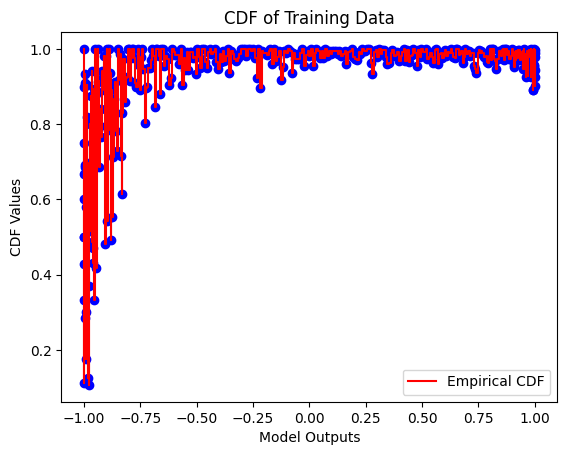

In [36]:
from sklearn.isotonic import IsotonicRegression

# Fit isotonic regression model
ir = IsotonicRegression(out_of_bounds='clip')
cdf_values = ir.fit_transform(sorted_model_outputs, sorted_ground_truths)

# Calculate empirical CDF values
empirical_cdfs = np.array([np.mean(sorted_ground_truths[:i+1] <= sorted_ground_truths[i]) for i in range(len(sorted_ground_truths))])
print(empirical_cdfs)

# Plot the CDF results
plt.step(sorted_model_outputs, empirical_cdfs, where='post', color='red', label='Empirical CDF')
plt.scatter(sorted_model_outputs, empirical_cdfs, color='blue')
plt.xlabel('Model Outputs')
plt.ylabel('CDF Values')
plt.title('CDF of Training Data')
plt.legend()
plt.show()

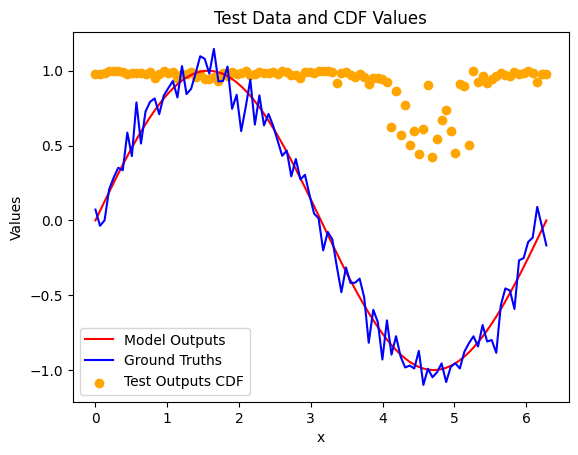

In [37]:
from scipy.interpolate import interp1d

# Generate test data
x_test = np.linspace(0, 2 * np.pi, 100)
ground_truths_test = np.sin(x_test) + np.random.normal(0, 0.1, x_test.shape)
model_outputs_test = np.sin(x_test)

# Interpolate new model output for test data
interpolator = interp1d(sorted_model_outputs, empirical_cdfs, fill_value="extrapolate")
cdf_values_test = interpolator(model_outputs_test)

# Plot the test data with CDF
plt.plot(x_test, model_outputs_test, color='red', label='Model Outputs')
plt.plot(x_test, ground_truths_test, color='blue', label='Ground Truths')
plt.scatter(x_test, cdf_values_test, color='orange', label='Test Outputs CDF')
plt.xlabel('x')
plt.ylabel('Values')
plt.title('Test Data and CDF Values')
plt.legend()
plt.show()

95% Prediction Interval: [0.4772902470354924, 0.99977511188657]


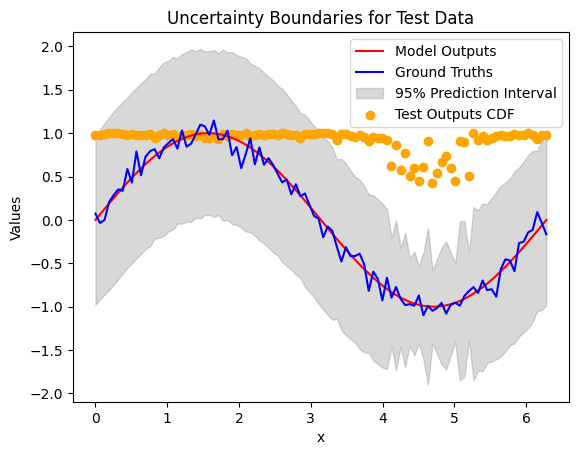

In [42]:
# Example of quantile calculation for prediction intervals
alpha = 0.05
lower_bound = np.percentile(cdf_values_test, 100 * (alpha / 2))
upper_bound = np.percentile(cdf_values_test, 100 * (1 - alpha / 2))

print(f"95% Prediction Interval: [{lower_bound}, {upper_bound}]")

# Plot the uncertainty boundary
plt.plot(x_test, model_outputs_test, color='red', label='Model Outputs')
plt.plot(x_test, ground_truths_test, color='blue', label='Ground Truths')
# plt.fill_between(x_test, lower_bound, upper_bound, color='gray', alpha=0.3, label='95% Prediction Interval')
plt.fill_between(x_test, model_outputs_test-cdf_values_test, model_outputs_test+cdf_values_test, color='gray', alpha=0.3, label='95% Prediction Interval')
plt.scatter(x_test, cdf_values_test, color='orange', label='Test Outputs CDF')
plt.xlabel('x')
plt.ylabel('Values')
plt.title('Uncertainty Boundaries for Test Data')
plt.legend()
plt.show()


In [41]:
cdf_values_test

array([0.9800995 , 0.97752681, 0.98729534, 0.99597495, 0.99674941,
       0.99624003, 0.99016575, 0.98044572, 0.98710932, 0.9830539 ,
       0.98374897, 0.97698516, 0.99450536, 0.94906248, 0.97962463,
       1.        , 0.98209115, 0.99345315, 0.95272842, 0.97654973,
       0.97793277, 0.99338564, 0.96142036, 0.97666136, 0.94246851,
       0.94329378, 0.96039555, 0.93303674, 0.98603853, 0.96529126,
       0.9921356 , 0.97958828, 0.9835274 , 1.        , 0.97090391,
       0.97884103, 0.99148937, 0.98332835, 0.98534882, 0.99077054,
       0.97719206, 0.99639955, 0.99164826, 0.97308623, 0.97283796,
       0.94862321, 0.99035152, 0.99001524, 0.98677139, 0.99985288,
       0.99968916, 0.99902737, 0.99407162, 0.91756323, 0.98670044,
       0.98930449, 0.97035426, 0.95638378, 0.97718325, 0.95900829,
       0.91090435, 0.95057211, 0.94961702, 0.94431668, 0.92296619,
       0.6263287 , 0.86567164, 0.57031651, 0.77390843, 0.50345638,
       0.59732973, 0.44559821, 0.61140534, 0.90512336, 0.42454

In [39]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.isotonic import IsotonicRegression
# from scipy.interpolate import interp1d

# # Generate example training data
# x = np.linspace(0, 2 * np.pi, 100)
# ground_truths = np.sin(x) + np.random.normal(0, 0.1, x.shape)
# model_outputs = np.sin(x)

# # Create and sort training archive
# training_archive = list(zip(model_outputs, ground_truths))
# sorted_archive = sorted(training_archive, key=lambda x: x[0])
# sorted_model_outputs, sorted_ground_truths = zip(*sorted_archive)

# # Fit isotonic regression model
# ir = IsotonicRegression(out_of_bounds='clip')
# cdf_values = ir.fit_transform(sorted_model_outputs, sorted_ground_truths)

# # Calculate empirical CDF values
# empirical_cdfs = np.array([np.mean(sorted_ground_truths[:i+1] <= sorted_ground_truths[i]) for i in range(len(sorted_ground_truths))])

# # Generate test data
# x_test = np.linspace(0, 2 * np.pi, 50)
# ground_truths_test = np.sin(x_test) + np.random.normal(0, 0.1, x_test.shape)
# model_outputs_test = np.sin(x_test)

# # Interpolate new model output for test data
# interpolator = interp1d(sorted_model_outputs, empirical_cdfs, fill_value="extrapolate")
# cdf_values_test = interpolator(model_outputs_test)

# # Calculate prediction intervals (95% prediction interval)
# alpha = 0.05
# lower_bounds = np.percentile(cdf_values_test, 100 * (alpha / 2))
# upper_bounds = np.percentile(cdf_values_test, 100 * (1 - alpha / 2))

# # Plot the training data
# plt.figure(figsize=(12, 8))
# plt.plot(x, model_outputs, color='red', label='Model Outputs')
# plt.plot(x, ground_truths, color='blue', label='Ground Truths')
# plt.xlabel('x')
# plt.ylabel('Values')
# plt.title('Training Data')
# plt.legend()
# plt.show()

# # Plot the test data with CDF
# plt.figure(figsize=(12, 8))
# plt.plot(x_test, model_outputs_test, color='red', label='Model Outputs')
# plt.plot(x_test, ground_truths_test, color='blue', label='Ground Truths')
# plt.scatter(x_test, cdf_values_test, color='orange', label='Test Outputs CDF')
# plt.xlabel('x')
# plt.ylabel('Values')
# plt.title('Test Data and CDF Values')
# plt.legend()
# plt.show()

# # Calculate the prediction intervals for each test output
# prediction_intervals_lower = np.percentile(ground_truths, 100 * (alpha / 2))
# prediction_intervals_upper = np.percentile(ground_truths, 100 * (1 - alpha / 2))

# # Plot the uncertainty boundary for test data
# plt.figure(figsize=(12, 8))
# plt.plot(x_test, model_outputs_test, color='red', label='Model Outputs')
# plt.plot(x_test, ground_truths_test, color='blue', label='Ground Truths')
# plt.fill_between(x_test, prediction_intervals_lower, prediction_intervals_upper, color='gray', alpha=0.3, label='95% Prediction Interval')
# plt.scatter(x_test, cdf_values_test, color='orange', label='Test Outputs CDF')
# plt.xlabel('x')
# plt.ylabel('Values')
# plt.title('Uncertainty Boundaries for Test Data')
# plt.legend()
# plt.show()
